In [7]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data.dataset import Dataset

import torchvision
from torchvision import datasets, transforms , models
from torchvision.models import resnet50, ResNet50_Weights , resnet18, ResNet18_Weights

from torch import nn
import torch.optim as optim

import pandas as pd
import warnings

In [8]:
gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if gpu else "cpu")
print("device:", device)

device: cuda:0


In [9]:
class BoatImages(Dataset):
    def __init__(self, _label_type = "Hull Type" , root = './', train=True):
        self.img_height  = 500  
        self.img_width   = 400
        self.img_height_crop = 256  
        self.img_width_crop  = 256
        self.tabular_data = pd.read_csv("boat_data_cleaned.csv")
        # self.name_from_path = re.compile(r'\./data/\w*\\(.+?)\\')
        self.name_from_path = re.compile(r'\./data/[^/]+/(.+?)/')

        self.train = train
        self.label_type = _label_type
        self.labels , self.categories = pd.factorize(self.tabular_data[self.label_type])

        if self.train:
            self.data_folder = os.path.join(root, 'data/train') # FIXME make a better train test split
        else:
            self.data_folder = os.path.join(root, 'data/test')

        self.dataset_train = datasets.ImageFolder(self.data_folder)

    # a getter function
    @property
    def label_type(self):
        return self._label_type
        
    # a setter function
    @label_type.setter
    def label_type(self, l):
        try:
            self._label_type = l
            self.labels , self.categories = pd.factorize(self.tabular_data[l])
        except:
            self._label_type = "Hull Type"
            self.labels , self.categories = pd.factorize(self.tabular_data[self._label_type])
            warnings.warn("Invalid label_type! Setting label_type to 'Hull Type'")



    def __getitem__(self, index):
        path, _ = self.dataset_train.samples[index]
        image = self.dataset_train.loader(path)
        
        boat_name = re.match(self.name_from_path , path).group(1).replace("_"," ")
        try:
            label_idx = self.tabular_data.index[(self.tabular_data['name'].eq(boat_name))].tolist()[0]
        except:
            label_idx = self.tabular_data.index[(self.tabular_data['name'].eq(boat_name+'.'))].tolist()[0]

        label = self.labels[label_idx]

        image = transforms.Resize(size = self.img_width)(image)


        if self.train:
            # image = transforms.RandomAffine((-5,5))(image)
            image = transforms.RandomCrop((self.img_width_crop, self.img_height_crop))(image)
            # image = transforms.ColorJitter(0.8, contrast = 0.4)(image)
            # image = transforms.RandomHorizontalFlip(p=0.5)(image)
        else:
            image = transforms.CenterCrop((self.img_width_crop, self.img_height_crop))(image)

        image = transforms.ToTensor()(image)

        # if self.transform is not None:
        #     image = self.transform(image)
        # if self.target_transform is not None:
        #     label = self.target_transform(label)

        # print(image,label)

        return image, label

    def __len__(self):
        return self.dataset_train.__len__()

In [10]:
dataset_train = BoatImages(_label_type = "Hull Type")
dataset_test = BoatImages(_label_type = "Hull Type",train=False)

In [ ]:
batch_size = 32
trainloader = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=16)
testloader = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=True, num_workers=16)

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter._next_data()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % dataset_train.labels[labels[j]] for j in range(batch_size)))

ValueError: Caught ValueError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/chris/.local/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/chris/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 58, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/chris/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 58, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/tmp/ipykernel_5442/961921182.py", line 57, in __getitem__
    image = transforms.RandomCrop((self.img_width_crop, self.img_height_crop))(image)
  File "/home/chris/.local/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/chris/.local/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 673, in forward
    i, j, h, w = self.get_params(img, self.size)
  File "/home/chris/.local/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 632, in get_params
    raise ValueError(f"Required crop size {(th, tw)} is larger than input image size {(h, w)}")
ValueError: Required crop size (400, 500) is larger than input image size (417, 400)


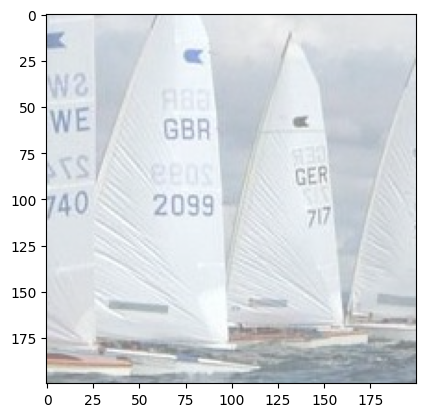

Triple Keel 




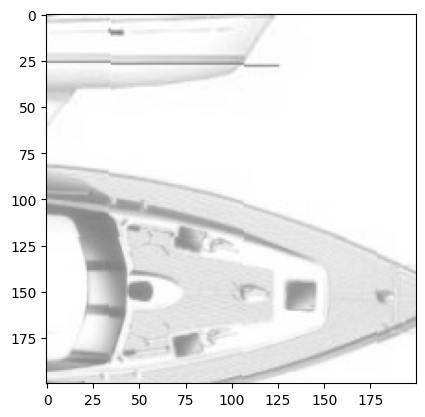

Fin (shoal draft) 




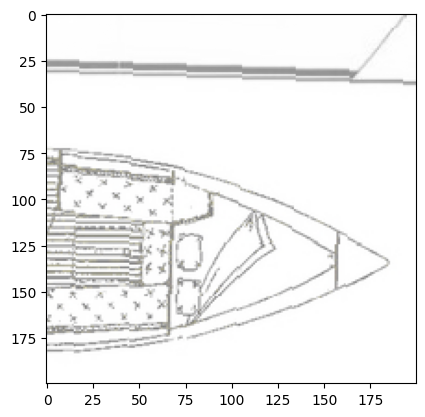

Keel/Cbrd. 




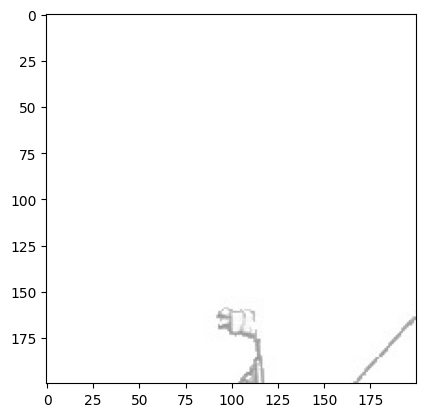

Lifting Keel 




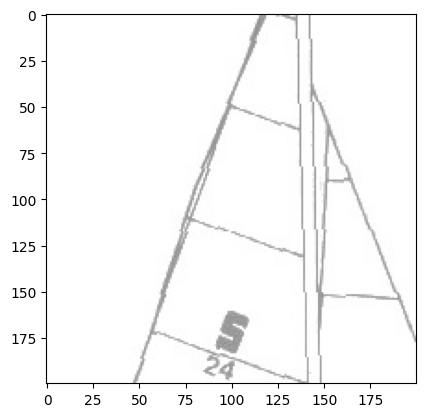

Fin w/bulb & spade rudder 




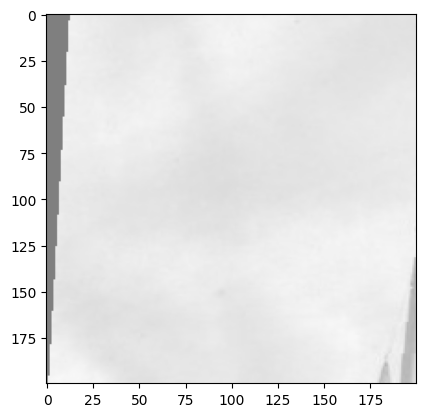

Fin with rudder on skeg 




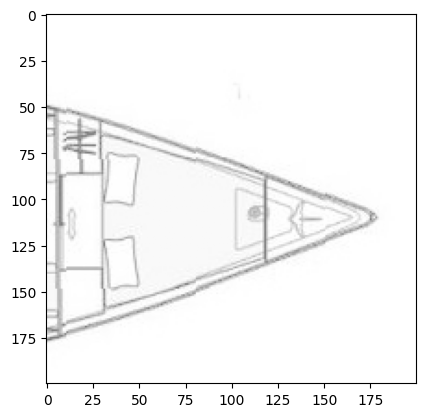

Sheel Keel 




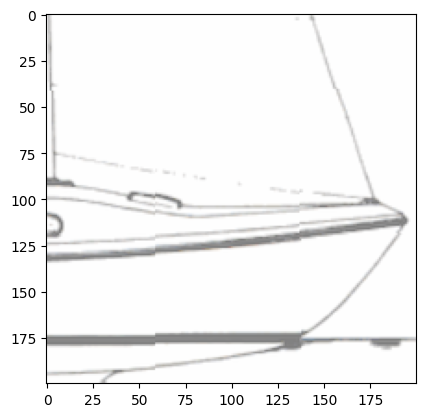

Fin w/bulb & spade rudder 




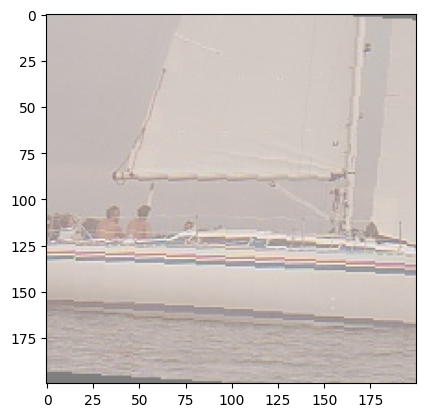

Fin w/spade rudder 




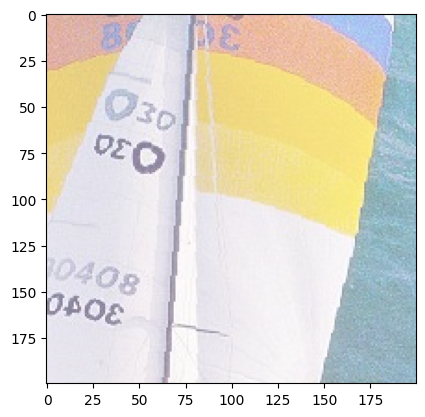

Fin with rudder on skeg 




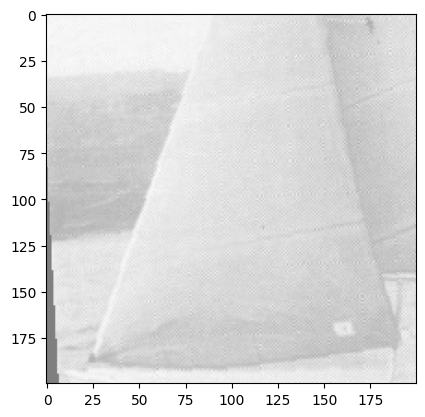

Fin with rudder on skeg 




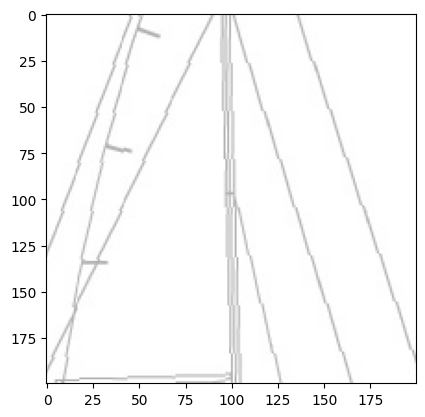

Fin w/spade rudder 




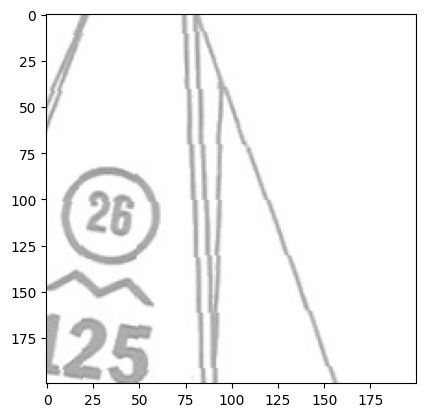

Long Keel 




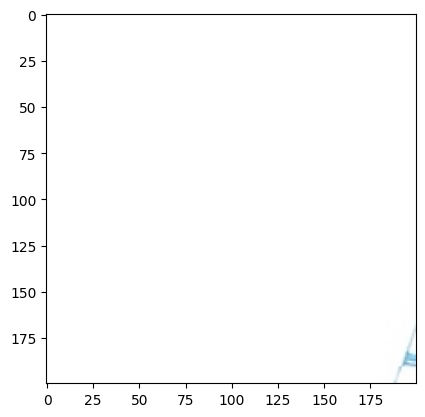

Fin w/spade rudder 




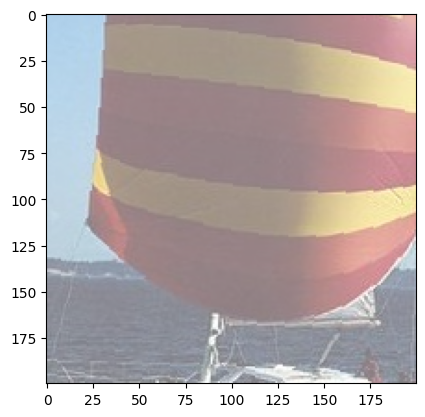

Fin w/bulb & spade rudder 




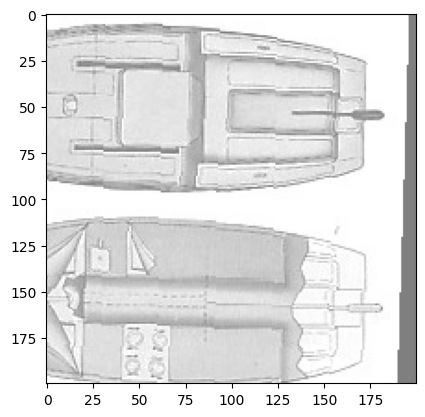

Fin w/bulb & spade rudder 




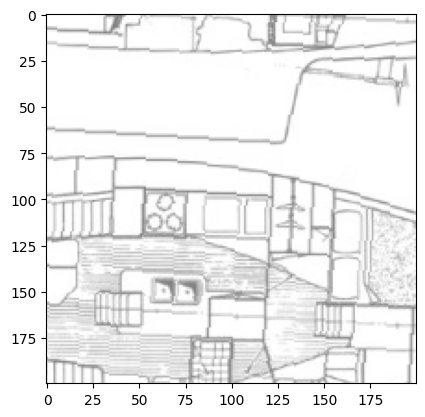

Fin w/bulb & spade rudder 




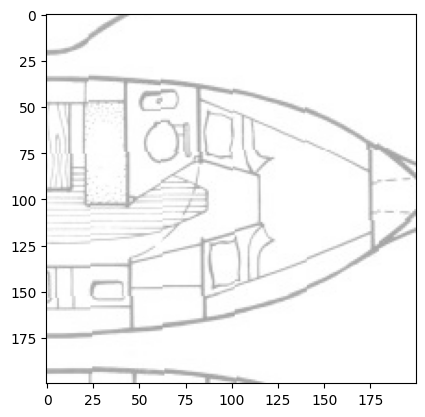

Fin w/transom hung rudder 




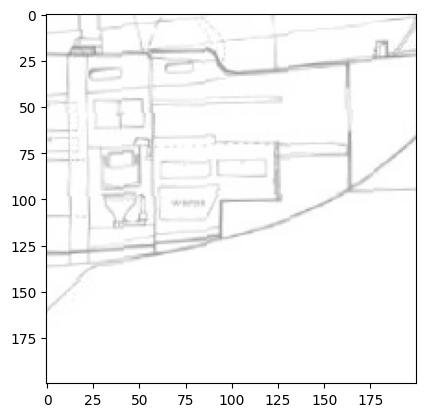

Dbrd. Dinghy 




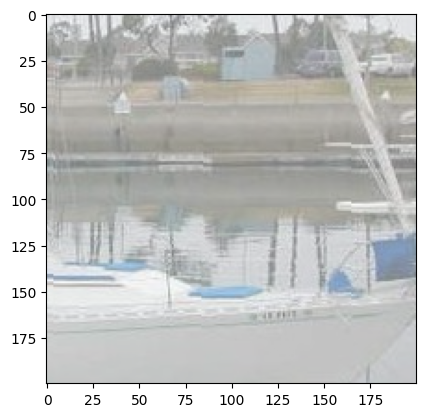

Fin Keel 




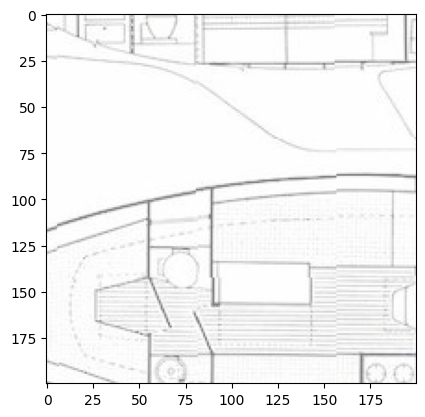

Fin w/spade rudder 




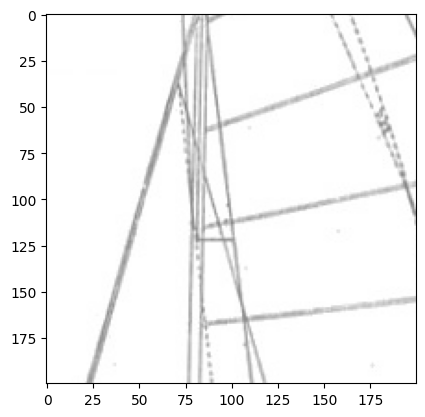

Trimaran Cbrd. 




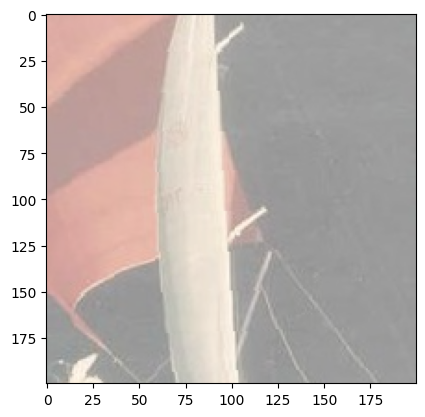

Fin w/bulb & spade rudder 




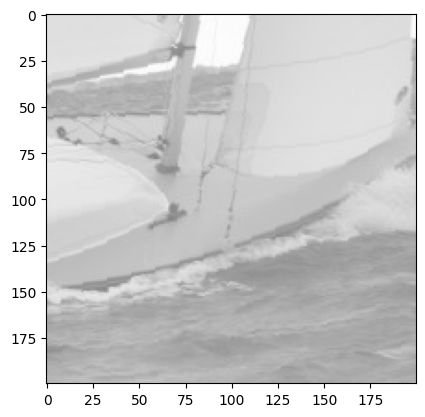

Long Keel 




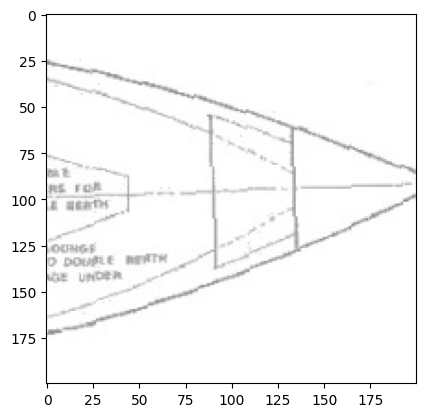

Fin w/spade rudder 




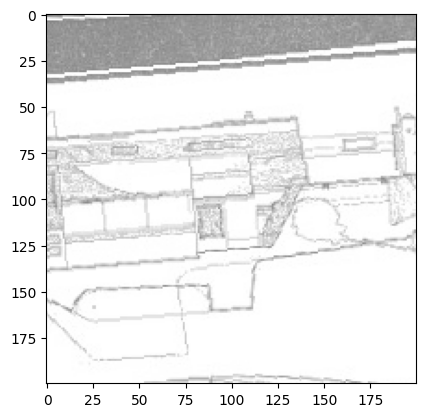

Fin w/spade rudder 




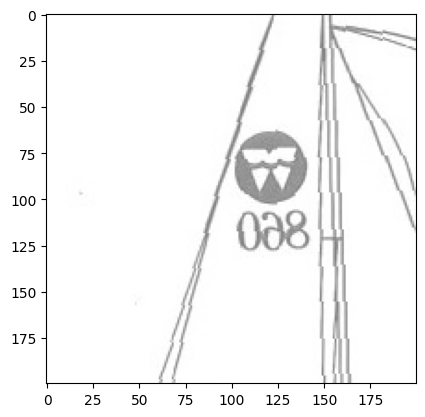

Fin with rudder on skeg 




Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa0e1385750>
Traceback (most recent call last):
  File "/home/chris/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/home/chris/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1430, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.10/selectors.py", line 416, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 


In [ ]:
for i in range(batch_size):
  imshow(images[i])
  #print(classes[labels[i].item()], "\n\n")
  print(dataset_train.categories[int(labels[i])], "\n\n")

In [ ]:
class resNet50(nn.Module):
    def __init__(self , num_classes):
        super(resNet50 , self).__init__()
        self.model_resnet = resnet50(weights=ResNet50_Weights.DEFAULT) # A pretrained resnet 50
        num_ftrs = self.model_resnet.fc.in_features
        self.model_resnet.fc = nn.Identity()
        self.fc1 = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.model_resnet(x)
        x = self.fc1(x)
        return x

In [ ]:
class resNet18(nn.Module):
    def __init__(self , num_classes):
        super(resNet18 , self).__init__()
        self.model_resnet = resnet18(weights=ResNet18_Weights.DEFAULT) # A pretrained resnet 18
        num_ftrs = self.model_resnet.fc.in_features
        self.model_resnet.fc = nn.Identity()
        self.fc1 = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.model_resnet(x)
        x = self.fc1(x)
        return x

In [ ]:
class baselineNet(nn.Module):
    def __init__(self , num_classes):
        super(baselineNet , self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(35344, 2**8)
        self.fc2 = nn.Linear(2**8, num_classes)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
no_epochs = 100
batch_size = 32

# types = dataset_train.tabular_data.columns
# FIXME Make it work for other label types
types = [
    "Hull Type",
    # "Rigging Type"
]

for type in types:
    # dataset_train = BoatImages(_label_type = type)
    # dataset_test = BoatImages(_label_type = type, train=False)
    # trainloader = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=16)
    # testloader = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=True, num_workers=16)

    net_list =[
    baselineNet,
    resNet18,
    resNet50
    ]

    for netType in net_list:
        torch.cuda.empty_cache()
        net = netType(len(dataset_train.categories))
        name = str(net.__class__.__name__)
        print(name,type)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.001)
        # optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.95)
        net.to(device)

        writer = SummaryWriter(comment=name+"_"+type)

        # Load the TensorBoard notebook extension
        %load_ext tensorboard
        net.train()
        reporting_interval = 50
        for epoch in range(no_epochs):  # Loop over the dataset multiple times
            epoch_loss = test_loss =  running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                # Get the inputs; data is a list of [inputs, labels]
                inputs, labels = data[0].to(device), data[1].to(device)
                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward + backward + optimize
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                # Print statistics
                epoch_loss += loss.item()
                running_loss += loss.item()
                if i % reporting_interval == reporting_interval-1:  # Print every reporting_interval mini-batches
                    print('[%d, %5d] loss: %.3f' %
                        (epoch, i + 1, running_loss / reporting_interval))
                    running_loss = 0.0
            
            # Calculate test loss and log to tensorboard
            net.eval()
            with torch.no_grad():
                for i, data in enumerate(testloader, 0):
                    inputs, labels = data[0].to(device), data[1].to(device)
                    outputs = net(inputs)
                    loss_test = criterion(outputs, labels)
                    test_loss += loss_test.item()


            writer.add_scalar("Loss_train", epoch_loss/(len(trainloader)), epoch)
            writer.add_scalar("Loss_test", test_loss/(len(testloader)), epoch)
            net.train()



        print('Finished Training' , str(net.__class__.__name__)+"_"+type)
        torch.save(net , name+'_'+type+'.pth')
        writer.flush()

baselineNet Hull Type
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ValueError: Caught ValueError in DataLoader worker process 14.
Original Traceback (most recent call last):
  File "/home/chris/.local/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/chris/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 58, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/chris/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 58, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/tmp/ipykernel_26977/1369309495.py", line 55, in __getitem__
    image = transforms.RandomCrop((self.img_width_crop, self.img_height_crop))(image)
  File "/home/chris/.local/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/chris/.local/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 673, in forward
    i, j, h, w = self.get_params(img, self.size)
  File "/home/chris/.local/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 632, in get_params
    raise ValueError(f"Required crop size {(th, tw)} is larger than input image size {(h, w)}")
ValueError: Required crop size (200, 200) is larger than input image size (185, 600)
